In [3]:
import pandas as pd
import seaborn as sns
sns.set_theme()

In [109]:
speech_tempo_train = pd.read_csv('../data/bea-base-train-flat/speech_tempo_train_5000.csv')
speech_tempo_dev = pd.read_csv('../data/bea-base-train-flat/speech_tempo_dev_5000.csv')

In [110]:
no_pause_speech_train = speech_tempo_train[['name', 'no_pause_speech']]
no_pause_speech_dev = speech_tempo_dev[['name', 'no_pause_speech']]

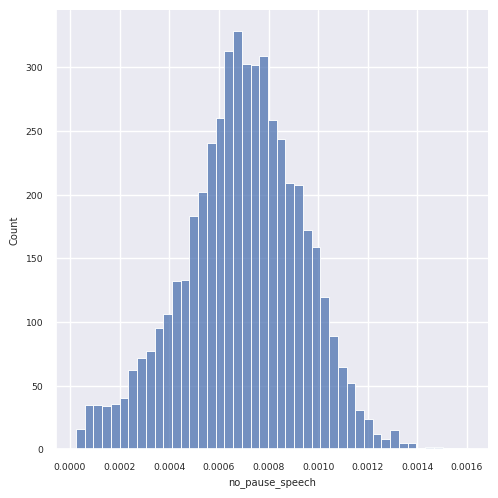

In [116]:
sns.set(font_scale=0.6)
sns.displot(no_pause_speech_train, x='no_pause_speech')

In [113]:
# Define threshold values and corresponding labels
thresholds = [0.00035, 0.0006, 0.0008, 0.0012]
labels = ['slow', 'mid-slow', 'normal', 'fast']

# Define function to apply to each element of the column
def label_element(val):
    if val < thresholds[0]:
        return labels[0]
    elif val >= thresholds[-1]:
        return labels[-1]
    else:
        for i in range(len(thresholds)-1):
            if thresholds[i] <= val < thresholds[i+1]:
                return labels[i+1]

,path,name,no_pause_speech,length,label
0,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_037_f_20_stm_0001,0.000332,0.376,slow
1,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_037_f_20_stm_0073,0.000068,1.834,slow
2,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_037_f_20_stm_0074,0.000536,4.078,mid-slow
3,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_037_f_20_stm_0075,0.000876,4.423,fast
4,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_037_f_20_stm_0076,0.000748,6.597,normal
...,...,...,...,...,...
4339,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_463_m_25_stm_0648,0.000884,2.544,fast
4340,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_463_m_25_stm_0650,0.000473,1.452,mid-slow
4341,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_463_m_25_stm_0651,0.000967,5.367,fast
4342,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_463_m_25_stm_0652,0.000325,0.961,slow


In [118]:
# Use apply method to apply the label_element function to each element of the column
speech_tempo_train['label'] = speech_tempo_train['whole_speech'].apply(label_element)
speech_tempo_train.drop(['whole_speech'], axis=1)

speech_tempo_dev['label'] = speech_tempo_dev['whole_speech'].apply(label_element)
speech_tempo_dev.drop(['whole_speech'], axis=1)

,path,name,no_pause_speech,length,label
0,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_037_f_20_stm_0001,0.000332,0.376,normal
1,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_037_f_20_stm_0073,0.000068,1.834,slow
2,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_037_f_20_stm_0074,0.000536,4.078,normal
3,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_037_f_20_stm_0075,0.000876,4.423,fast
4,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_037_f_20_stm_0076,0.000748,6.597,fast
...,...,...,...,...,...
4339,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_463_m_25_stm_0648,0.000884,2.544,fast
4340,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_463_m_25_stm_0650,0.000473,1.452,normal
4341,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_463_m_25_stm_0651,0.000967,5.367,fast
4342,/srv/data/egasj/corpora/Bea_base/bea-base-dev-...,bea_463_m_25_stm_0652,0.000325,0.961,mid-slow


In [119]:
print(speech_tempo_train['label'].value_counts())
print(speech_tempo_dev['label'].value_counts())

fast        2976
normal      1185
mid-slow     626
slow         213
Name: label, dtype: int64
fast        1926
normal      1116
mid-slow     885
slow         417
Name: label, dtype: int64


In [121]:
speech_tempo_train.to_csv('../data/bea-base-train-flat/whole_speech_train_5000.csv', index=False)
speech_tempo_dev.to_csv('../data/bea-base-train-flat/whole_speech_dev_5000.csv', index=False)